# Gas Leakage Prediction

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

Here the dataset used for analysis is downloaded from Kaggle.
[Environmental Sensor Telemetry Data](https://www.kaggle.com/garystafford/environmental-sensor-data-132k)

The data was generated from a series of three identical, custom-built, breadboard-based sensor arrays. Each array was connected to a Raspberry Pi devices. Each of the three IoT devices was placed in a physical location with varied environmental conditions.

##### There are nine columns in this data set

| column   | description          | units      |
|----------|----------------------|------------|
| ts       | timestamp of event   | epoch      |
| device   | unique device name   | string     |
| co       | carbon monoxide      | ppm (%)    |
| humidity | humidity             | percentage |
| light    | light detected?      | boolean    |
| lpg      | liquid petroleum gas | ppm (%)    |
| motion   | motion detected?     | boolean    |
| smoke    | smoke                | ppm (%)    |
| temp     | temperature          | Fahrenheit |




In [11]:
df=pd.read_csv('data.csv')
df.head()

,ts,device,co,humidity,light,lpg,motion,smoke,temp
0,1.594512e+09,b8:27:eb:bf:9d:51,0.004956,51.000000,False,0.007651,False,0.020411,22.700000
1,1.594512e+09,00:0f:00:70:91:0a,0.002840,76.000000,False,0.005114,False,0.013275,19.700001
2,1.594512e+09,b8:27:eb:bf:9d:51,0.004976,50.900000,False,0.007673,False,0.020475,22.600000
3,1.594512e+09,1c:bf:ce:15:ec:4d,0.004403,76.800003,True,0.007023,False,0.018628,27.000000
4,1.594512e+09,b8:27:eb:bf:9d:51,0.004967,50.900000,False,0.007664,False,0.020448,22.600000


In [12]:
df.shape

(405184, 9)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405184 entries, 0 to 405183
Data columns (total 9 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   ts        405184 non-null  float64
 1   device    405184 non-null  object 
 2   co        405184 non-null  float64
 3   humidity  405184 non-null  float64
 4   light     405184 non-null  bool   
 5   lpg       405184 non-null  float64
 6   motion    405184 non-null  bool   
 7   smoke     405184 non-null  float64
 8   temp      405184 non-null  float64
dtypes: bool(2), float64(6), object(1)
memory usage: 22.4+ MB


## Data Analysis

<AxesSubplot:xlabel='device', ylabel='count'>

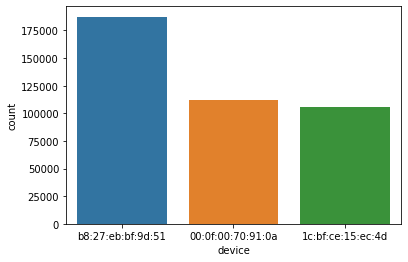

In [14]:
sns.countplot(x='device',data=df)

In [15]:
import seaborn as sns

<AxesSubplot:xlabel='ts', ylabel='lpg'>

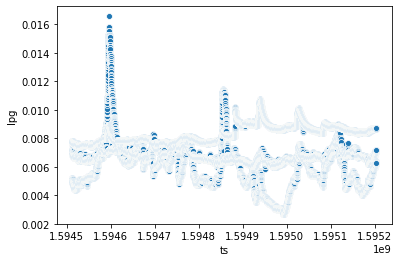

In [16]:
sns.scatterplot(x='ts',y='lpg',data=df)

<AxesSubplot:xlabel='smoke', ylabel='lpg'>

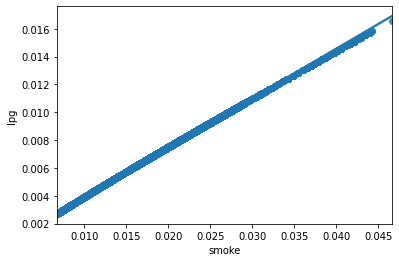

In [17]:
sns.regplot(x='smoke',y='lpg',data=df)

<AxesSubplot:xlabel='temp', ylabel='lpg'>

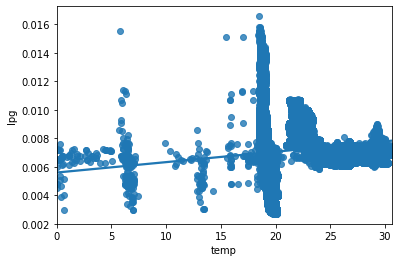

In [18]:
sns.regplot(x='temp',y='lpg',data=df)

<AxesSubplot:xlabel='humidity', ylabel='lpg'>

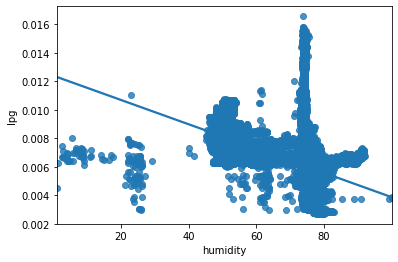

In [19]:
sns.regplot(x='humidity',y='lpg',data=df)

<AxesSubplot:xlabel='co', ylabel='lpg'>

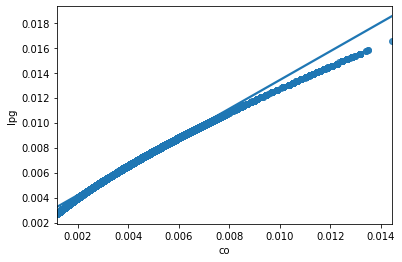

In [20]:
sns.regplot(x='co',y='lpg',data=df)

## Correlation 

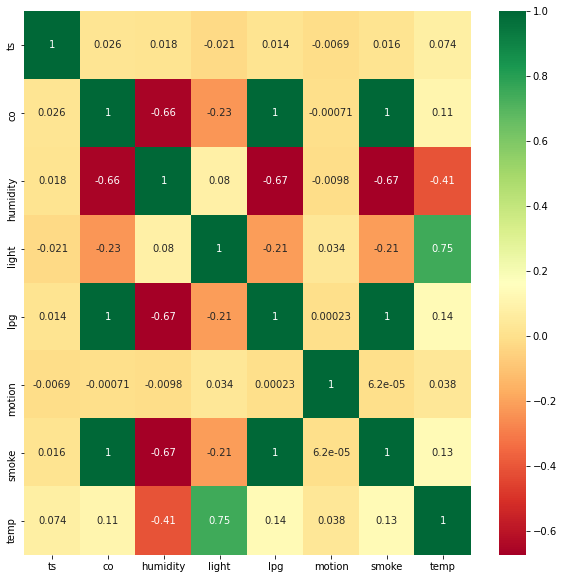

In [21]:
plt.figure(figsize = (10,10))
sns.heatmap(df.corr(), annot = True, cmap = "RdYlGn")

plt.show()

In [22]:
device=df[['device']]

In [23]:
device=pd.get_dummies(device)
device.head()

,device_00:0f:00:70:91:0a,device_1c:bf:ce:15:ec:4d,device_b8:27:eb:bf:9d:51
0,0,0,1
1,1,0,0
2,0,0,1
3,0,1,0
4,0,0,1


In [24]:
df.drop(['device','ts'],axis=1,inplace=True)

In [25]:
df=pd.concat([df,device],axis=1)
df.head()

,co,humidity,light,lpg,motion,smoke,temp,device_00:0f:00:70:91:0a,device_1c:bf:ce:15:ec:4d,device_b8:27:eb:bf:9d:51
0,0.004956,51.000000,False,0.007651,False,0.020411,22.700000,0,0,1
1,0.002840,76.000000,False,0.005114,False,0.013275,19.700001,1,0,0
2,0.004976,50.900000,False,0.007673,False,0.020475,22.600000,0,0,1
3,0.004403,76.800003,True,0.007023,False,0.018628,27.000000,0,1,0
4,0.004967,50.900000,False,0.007664,False,0.020448,22.600000,0,0,1


## LPG Leakage Prediction By Random Forest Regressor

A Random Forest is an ensemble technique capable of performing both regression and classification tasks with the use of multiple decision trees and a technique called Bootstrap and Aggregation, commonly known as bagging. The basic idea behind this is to combine multiple decision trees in determining the final output rather than relying on individual decision trees.

In [26]:
X=df.drop(['lpg','co'],axis=1)

In [27]:
y=df.lpg

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [29]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(X_train, y_train)

RandomForestRegressor()

In [30]:
reg_rf.score(X_train, y_train)

0.999999988836108

In [31]:
y_pred=reg_rf.predict(X_test)
reg_rf.score(X_test, y_test)

0.9999962466316614

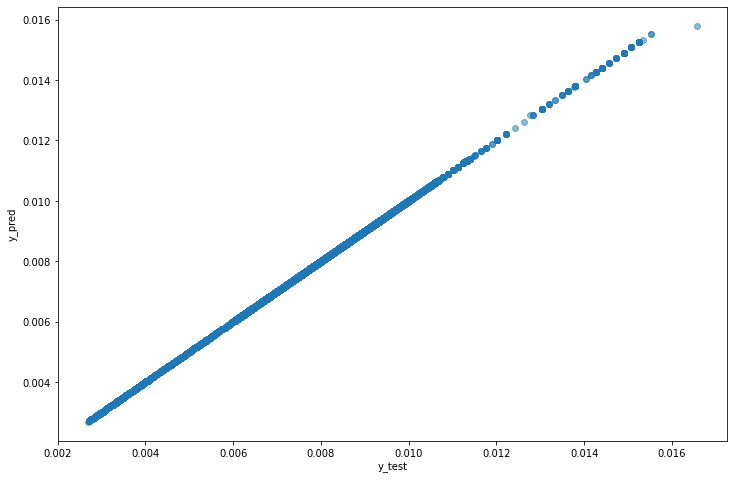

<Figure size 864x576 with 0 Axes>

In [33]:
plt.figure(figsize = (12,8))
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.figure(figsize = (12,8))
plt.show()

In [34]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 1.7391221960789715e-08
MSE: 7.815038457841807e-12
RMSE: 2.7955390281378308e-06


# CO2 Leakage Prediction By Random Forest Regressor

In [35]:
X=df.drop(['lpg','co'],axis=1)

In [36]:
y=df.co

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [38]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(X_train, y_train)

RandomForestRegressor()

In [39]:
reg_rf.predict(X_test)
reg_rf.score(X_train, y_train)

0.999999985906235

In [40]:
y_pred=reg_rf.predict(X_test)
reg_rf.score(X_test, y_test)

0.9999929716069024

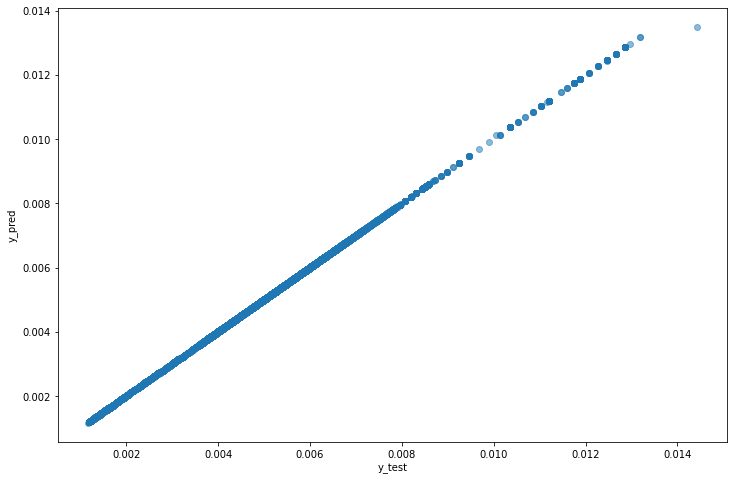

<Figure size 864x576 with 0 Axes>

In [42]:
plt.figure(figsize = (12,8))
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.figure(figsize = (12,8))
plt.show()

In [43]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 1.8626956666772648e-08
MSE: 1.097673868365688e-11
RMSE: 3.3131161590950718e-06
